# Mini Project - Classification of Wind Turbine Alarms
To start I will first look at the alarm data, and 1 quarter worth of data

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline
#pd.show_versions()

In [2]:
# path = 'C:\\Users\\kthomas\\Google Drive\\SMU\\DataMining\\MiniProject\\Data\\'
path = '~/Documents/thomaskh522@gmail.com/SMU/DataMining/MiniProject/Data/'
# path = 'D:/Pattern/' # casey home
#path = 'O:/wpshistory_LOGANSGAP/' # casey work

alarms_desc = pd.read_csv(path + "Siemens_Fault_Code_Descriptions.csv")
scada = pd.read_csv(path + "SCADAcombined2017Q1.csv")
#q2 = pd.read_csv(path + "SCADAcombined2017Q2.csv")
#q3 = pd.read_csv(path + "SCADAcombined2017Q3.csv")
#q4 = pd.read_csv(path + "SCADAcombined2017Q4.csv")
print('alarm description shape:',alarms_desc.shape)
print('scada data shape:',scada.shape)

alarm description shape: (2141, 3)
scada data shape: (1111023, 79)


In [3]:
# drop columns that were missing values
scada.dropna(thresh=10000,axis=1,inplace=True)

colsdrop = ['StationId', 'CommunicationId', 'NeighbourId',
           'NeighbourIdTwo', 'XPos', 'YPos', 'wtc_ActPower_min',
           'wtc_ActPower_max', 'wtc_ActPower_stddev',
           'wtc_AmpPhR_min', 'wtc_AmpPhR_max', 'wtc_AmpPhR_mean',
           'wtc_AmpPhR_stddev', 'wtc_AmpPhS_min', 'wtc_AmpPhS_max',
           'wtc_AmpPhS_mean', 'wtc_AmpPhS_stddev', 'wtc_AmpPhT_min',
           'wtc_AmpPhT_max', 'wtc_AmpPhT_mean', 'wtc_AmpPhT_stddev',
           'wtc_RawPower_min', 'wtc_RawPower_max', 'wtc_RawPower_mean',
           'wtc_RawPower_stddev', 'wtc_GenRpm_mean',
           'wtc_MainSRpm_mean', 'wtc_PitchRef_BladeA_mean',
           'wtc_PitchRef_BladeB_mean', 'wtc_PitchRef_BladeC_mean','wtc_TwrHumid_mean', 
            'wtc_PitcPosA_mean','wtc_PitcPosB_mean', 'wtc_PitcPosC_mean']

scada.drop(colsdrop,axis=1,inplace=True)

print('scada data shape:',scada.shape)

scada.isnull().sum()

scada data shape: (1111023, 38)


TimeStamp                   0
Name                        0
wtc_ActPower_mean          82
wtc_YawPos_mean            83
wtc_BoostAva_mean         103
wtc_PowerRef_endvalue      81
wtc_AcWindSp_mean          82
wtc_AcWindSp_stddev        82
wtc_NacelPos_mean          83
wtc_AmbieTmp_mean          83
wtc_GeOilTmp_mean          83
wtc_HubTemp_mean           83
wtc_NacelTmp_mean          83
wtc_ConvWTmp_mean          82
wtc_HydOilTm_mean          83
wtc_MainBTmp_mean          83
wtc_AlarmCde_endvalue      83
wtc_ScInOper_timeon        83
wtc_BoostKWh_endvalue     102
WS_Thies_80m_Avg            0
WS_Thies_80m_Std            0
WS_Thies_60m_Avg            0
WS_Thies_60m_Std            0
WS_Thies_26m_Avg            0
WS_Thies_26m_Std            0
WindDir_ICEFREE_D1_WVT      0
WindDir_Angle_3D_Avg        0
WindDir_Angle_3D_Std        0
WindDir_76m_D1_WVT          0
WindDir_76m_SD1_WVT         0
WindDir_Angle_3D_Avg.1      0
WindDir_Angle_3D_Std.1      0
Elevation_angle_3D_Avg      0
WS_ICEFREE

In [4]:
# merge the alarms with the alarm descriptions

scada.dropna(inplace=True)
scada['wtc_AlarmCde_endvalue'] = scada['wtc_AlarmCde_endvalue'].astype(int)

df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')

# del alarms_desc

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index

df.dropna(inplace=True)

print(df.shape)
df.describe().transpose()

(1114539, 40)


count          mean           std          min  \
wtc_ActPower_mean       1114539.0   1134.884426    787.822963   -43.836520   
wtc_YawPos_mean         1114539.0    185.074656     93.876385     0.000000   
wtc_BoostAva_mean       1114539.0      4.752159     21.986613     0.000000   
wtc_PowerRef_endvalue   1114539.0   1812.821748    627.224312     0.000000   
wtc_AcWindSp_mean       1114539.0      8.354188      3.403140     0.000000   
wtc_AcWindSp_stddev     1114539.0      1.126038      0.486062     0.000000   
wtc_NacelPos_mean       1114539.0    185.075626     93.876335     0.000000   
wtc_AmbieTmp_mean       1114539.0     13.747872      6.971051    -8.000000   
wtc_GeOilTmp_mean       1114539.0     43.778763      4.663345    12.000000   
wtc_HubTemp_mean        1114539.0     18.468616      6.333474    -4.000000   
wtc_NacelTmp_mean       1114539.0     21.615170      5.889192    -1.000000   
wtc_ConvWTmp_mean       1114539.0     31.520840      3.588484     1.895848   
wtc_HydOilTm_mean       1114539.0     30.716036      2.602362     0.000000   
wtc_MainBTmp_mean       1114539.0     39.276407      5.549484     8.000000   
wtc_AlarmCde_endvalue   1114539.0    296.107195   3224.360536     0.000000   
wtc_ScInOper_timeon     1114539.0    558.797288    144.599648     0.000000   
wtc_BoostKWh_endvalue   1114539.0  35184.241025  21633.249142  2586.900000   
WS_Thies_80m_Avg        1114539.0      7.105158      2.558514     0.271000   
WS_Thies_80m_Std        1114539.0      0.852456      0.468277     0.036000   
WS_Thies_60m_Avg        1114539.0      6.392860      2.338990     0.378000   
WS_Thies_60m_Std        1114539.0      0.884450      0.481283     0.038000   
WS_Thies_26m_Avg        1114539.0      4.770093      2.005777     0.108000   
WS_Thies_26m_Std        1114539.0      0.922125      0.498049     0.038000   
WindDir_ICEFREE_D1_WVT  1114539.0    177.277021     91.238206     0.118000   
WindDir_Angle_3D_Avg    1114539.0    570.041629     26.962488    30.700000   
WindDir_Angle_3D_Std    1114539.0      0.329660      5.329712     0.073000   
WindDir_76m_D1_WVT      1114539.0    121.168858     96.485310     0.029000   
WindDir_76m_SD1_WVT     1114539.0      5.393298     10.410737     0.059000   
WindDir_Angle_3D_Avg.1  1114539.0    570.041629     26.962488    30.700000   
WindDir_Angle_3D_Std.1  1114539.0      0.329660      5.329712     0.073000   
Elevation_angle_3D_Avg  1114539.0    -12.154716     54.700483   -53.550000   
WS_ICEFREE_Avg          1114539.0      7.145245      2.487438     1.000000   
WS_ICEFREE_Std          1114539.0      0.828748      0.414470     0.000000   
BP_mbar_76m_Avg         1114539.0    949.990086      6.819226   930.000000   
AirTC_3m_Avg            1114539.0     12.957194      7.826222   -12.920000   
RH_76m_Avg              1114539.0     81.547533     23.609894    35.330000   
Code                    1114539.0    296.107195   3224.360536     0.000000   

                                 25%           50%           75%  \
wtc_ActPower_mean         421.413300   1064.293000   1862.718000   
wtc_YawPos_mean           134.800000    190.711600    242.548350   
wtc_BoostAva_mean           0.000000      0.000000      0.000000   
wtc_PowerRef_endvalue    1373.000000   2227.000000   2300.000000   
wtc_AcWindSp_mean           5.949369      8.237452     10.734260   
wtc_AcWindSp_stddev         0.772289      1.070437      1.398141   
wtc_NacelPos_mean         134.800000    190.711700    242.550000   
wtc_AmbieTmp_mean           9.000000     14.988300     19.000000   
wtc_GeOilTmp_mean          41.000000     44.032930     47.001550   
wtc_HubTemp_mean           14.000000     19.321650     23.000000   
wtc_NacelTmp_mean          18.000000     22.000000     26.000000   
wtc_ConvWTmp_mean          29.955540     30.084460     31.817220   
wtc_HydOilTm_mean          30.061270     30.337320     30.933940   
wtc_MainBTmp_mean          36.000000     40.000000     43.000000   
wtc_AlarmCde_endvalue       0.000000      0

In [6]:
# Create new variables

df['WindSpeed_adj'] = df['wtc_AcWindSp_mean'].round(1) # used for groupby later

# Recode column
df = df.rename(columns={'Fault Type': 'Fault_Type'})
#df['Fault_Type'] = df['Fault_Type'].replace('1', '0')
df['Fault_Type'] = df['Fault_Type'].replace('W','0')
df['Fault_Type'] = df['Fault_Type'].astype(int)

#derate = (df['wtc_ActPower_mean'] == df['wtc_PowerRef_endvalue']) & (df['wtc_PowerRef_endvalue'] < 2300)
derate = (df['wtc_PowerRef_endvalue'] < 2300)

df['Derated'] = [1 if x == True else 0 for x in derate]

available = (df['Fault_Type'] != 1) & (df['wtc_ScInOper_timeon'] == 600)
df['Available'] = [1 if x == True else 0 for x in available]

df['Air_density'] = (df['BP_mbar_76m_Avg']*100)/((df['AirTC_3m_Avg']+273.15)*287.05)

# df['MainBearingFault'] = [1 if x == 64038 else 0 for x in df['Code']]

In [7]:
# use smaller dataset to test

#turbines = ['T003','T062','T093']
turbines = ['T014']
#turbines = ['T003','T009','T014','T015','T022','T056','T071'] # known main bearing failures

#df2 = df.loc[(df['Name'].isin(turbines)) & (df['Available'] == 1) & (df['Derated'] == 0)]
df2 = df.loc[(df['Name'].isin(turbines))]
             
df2.shape
# df3 = df2['2017-1-10':'2017-1-31']

(12817, 44)

### Ploting Historical Quantiles

In [8]:
pcurve95 = df2.groupby('WindSpeed_adj').quantile(q=0.95)
pcurve75 = df2.groupby('WindSpeed_adj').quantile(q=0.75)
pcurve50 = df2.groupby('WindSpeed_adj').median()
pcurve25 = df2.groupby('WindSpeed_adj').quantile(q=0.25)
pcurve5 = df2.groupby('WindSpeed_adj').quantile(q=0.05)

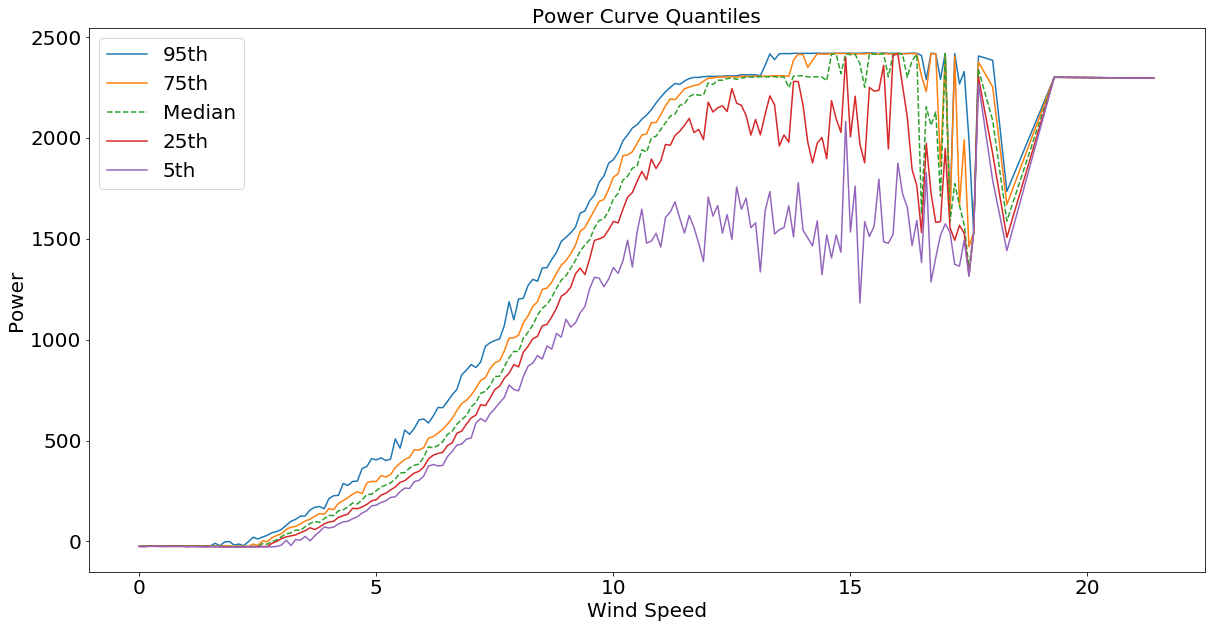

In [9]:
x1 = pcurve95.index.values
y1 = pcurve95['wtc_ActPower_mean'] 

x2 = pcurve75.index.values
y2 = pcurve75['wtc_ActPower_mean'] 

x3 = pcurve50.index.values
y3 = pcurve50['wtc_ActPower_mean'] 

x4 = pcurve25.index.values
y4 = pcurve25['wtc_ActPower_mean'] 

x5 = pcurve5.index.values
y5 = pcurve5['wtc_ActPower_mean'] 

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.plot(x1, y1, label='95th')
plt.plot(x2, y2, label='75th')
plt.plot(x3, y3, linestyle = 'dashed', label='Median')
plt.plot(x4, y4, label='25th')
plt.plot(x5, y5, label='5th')

# plt.axhline(y=2300, color='k')
plt.title("Power Curve Quantiles")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

### Sigmoid Curve Fitting

x0: 8.726235766865742
k: 0.5954186240148661
Cap: 2300.827


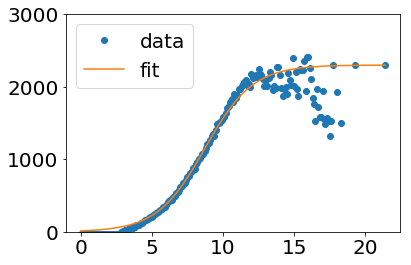

In [10]:
# Historical 25th Percentile

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve25.index.values
ydata = pcurve25['wtc_ActPower_mean'].values
cap = np.max(pcurve5['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)

pcurve25_x0 = popt[0]
pcurve25_k = popt[1]
pcurve25_cap = cap
print('x0:',pcurve25_x0)
print('k:',pcurve25_k)
print('Cap:',pcurve25_cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

[8.59077997 0.63523465]
Cap= 2418.5564999999997


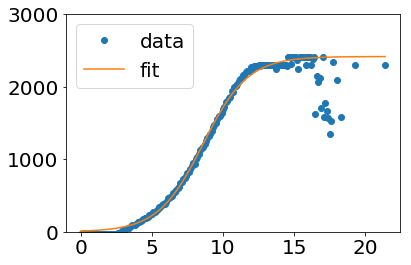

In [11]:
# Historical Median

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve50.index.values
ydata = pcurve50['wtc_ActPower_mean'].values
cap = np.max(pcurve50['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

#### Apply Curve Fitting Paramters to DataFrame

In [12]:
def PowerCurve(wind, x0,k,cap):
    y = cap / (1 + np.exp(-k*(wind-x0)))
    return y

df['ExpectedEnergy_ref'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=7.70514731, 
                                                          k=0.85471648, 
                                                          cap=2300), 
                                     axis = 1)

df['ExpectedEnergy_25th'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=pcurve25_x0, 
                                                          k=pcurve25_k,
                                                          cap=pcurve25_cap), 
                                     axis = 1)
df['ExpectedEnergy_median'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'],x0=8.52473917, k=0.66652044, cap=2421.044), axis = 1)

In [13]:
turbines = ['T014']
#turbines = ['T003','T009','T014','T015','T022','T056','T071'] # known main bearing failures

#df2 = df.loc[(df['Name'].isin(turbines)) & (df['Available'] == 1) & (df['Derated'] == 0)]
df_test = df.loc[(df['Name'].isin(turbines))]

print(len(df))
print(len(df2))
print(len(df_test))

1114539
12817
12817


# Classification of Turbine Performance
The goal of this model is to predict if a wind turbine is performing in one of three ways: minimum performance, average (or median performance), or maximum performance.

## Feature Engineering
In order to perform this analysis, class labels will have to be created. This is done by creating a simple function and applying it to the data frame.

In [36]:
# Make labels
# insipred by: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns


def make_class(row):
    if row["wtc_ActPower_mean"] <= row["ExpectedEnergy_25th"]:
        return "1"
    else:
        return "0"

df["Underperformance"] = df.apply(lambda x: make_class(x), axis=1)
df['Underperformance'] = df['Underperformance'].astype(int)

df_test["Underperformance"] = df_test.apply(lambda x: make_class(x), axis=1)
df_test['Underperformance'] = df_test['Underperformance'].astype(int)

# percent = (df['Underperformance'].sum() / len(df))*100
# print('Percent of Under Performance Data:',percent,"%")

percent = (df_test['Underperformance'].sum() / len(df_test))*100
print('Percent of Under Performance Data:',percent,"%")

Percent of Under Performance Data: 31.231957556370443 %


/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
df_test.columns

Index(['Name', 'wtc_ActPower_mean', 'wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'Code', 'Description', 'Fault_Type', 'WindSpeed_adj', 'Derated',
       'Available', 'Air_density', 'ExpectedEnergy_ref', 'Expect

## Support Vector Machine Preprocessing
According to several references the SVM classifer benefits greatly from scaling of the data. It can speed up the trianing process significantly. SciKitLearn has some built in functions to expidite this processs. First, however, the variables must be encoded from the string class variable into a numeric variable that can be interpreted by SciKitLearn.

In [38]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df_test["Underperformance"].unique()))
df_test["target"] = le.transform(df_test["Underperformance"])
df["target"] = le.transform(df["Underperformance"])


#Now the other variables used to train the model need to scaled. First, however, un-need variables need to be dropped.
y = df_test["target"]
y2= df['target']



df3 = df.drop(['wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'WindSpeed_adj','ExpectedEnergy_ref', 'ExpectedEnergy_25th',
       'ExpectedEnergy_median', 'Underperformance','wtc_ActPower_mean','Fault_Type','Code', 
        'Description', 'Fault_Type','Name','Derated','target'], axis=1)

keepcols2 = ["Air_density", "wtc_ScInOper_timeon", "AirTC_3m_Avg", "WS_Thies_60m_Avg", "WS_ICEFREE_Avg", "BP_mbar_76m_Avg"]


data = df_test[keepcols2]

X = preprocessing.scale(data) 
X2 = preprocessing.scale(df3)

data.columns

/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Index(['Air_density', 'wtc_ScInOper_timeon', 'AirTC_3m_Avg',
       'WS_Thies_60m_Avg', 'WS_ICEFREE_Avg', 'BP_mbar_76m_Avg'],
      dtype='object')

## Create Training and Test Data (80/20 Split)

In [39]:
#  Make test and training data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [26]:
X_train

array([[-1.2337378 ,  0.23184225,  1.37056927,  0.05241474, -0.02721657,
        -0.28780902],
       [ 0.36327217,  0.23184225, -0.09997865, -0.01039204, -0.01998305,
         1.33301503],
       [ 0.39055432,  0.23184225, -0.7403331 , -1.18919423, -1.2745966 ,
        -1.02454723],
       ...,
       [-0.27966845,  0.23184225,  0.25741061,  0.55828708,  0.54342764,
        -0.14046138],
       [-0.05965456,  0.23184225, -0.26906604,  2.72362578,  2.62105482,
        -1.17189487],
       [-0.97463708,  0.23184225,  0.85177841,  0.04643314,  0.02623109,
        -1.02454723]])

## Create a model and optimize parameters with Grid Search
Running the SVC classifier within SciKit Learn proved to be to costly computationally. As a result, we proceeded with a differnt SVM Classifier. Specifically, we use the SGDClassifier which utilized stochastic gradient descent which greatly increased training rates.

Since there are many possible parameters that can be put into the classifer, I ran through various alphas (penalty term), learning rates, and learning rate schedules to find the strongest possible model based on the input parameters. This was done using a grid search.

SciKitLearn Provides an excellent example on using grid search to find optimal parameters using cross validation.

http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

## Results
The best SGDClassifer had the following attributes: 'alpha': 1e-06, 'eta0': 0.5, 'learning_rate': 'invscaling'

The resulting model had an accuracy of 72.45 percent. 

In [41]:
# Thanks to sklearn for a great example: 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import linear_model

# Set the parameters by cross-validation
clist = [0.1, 1, 10, 100]
tuned_parameters = [#{'kernel': ['rbf'], 'C': clist},
                    {'kernel': ['linear'], 'C': clist}
#                     {'kernel': ['poly'], 'C': clist},
#                     {'kernel': ['sigmoid'], 'C': clist}
                   ]

alphas = 10.0**-np.arange(1,7)
tp = [{'alpha':alphas, 'learning_rate':['constant', 'optimal', 'invscaling'], 'eta0': [0.01, 0.1, 0.5, 1.0]}]

# clf = GridSearchCV(svm.SVC(), tuned_parameters)
clf = GridSearchCV(linear_model.SGDClassifier(), tp)
# clf = svm.SVC(kernel='linear', C=1
clf.fit(X2_train, y2_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
# print()
y_true, y_pred = y2_test, clf.predict(X2_test)
acc = accuracy_score(y2_test,y_pred)
print(classification_report(y_true, y_pred))
print()
print("Accuracy:", acc)

Best parameters set found on development set:

{'alpha': 1e-06, 'eta0': 0.5, 'learning_rate': 'invscaling'}

Grid scores on development set:

0.703 (+/-0.003) for {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
0.700 (+/-0.002) for {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
0.700 (+/-0.003) for {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
0.613 (+/-0.060) for {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
0.700 (+/-0.003) for {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
0.701 (+/-0.004) for {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
0.584 (+/-0.100) for {'alpha': 0.1, 'eta0': 0.5, 'learning_rate': 'constant'}
0.700 (+/-0.003) for {'alpha': 0.1, 'eta0': 0.5, 'learning_rate': 'optimal'}
0.699 (+/-0.005) for {'alpha': 0.1, 'eta0': 0.5, 'learning_rate': 'invscaling'}
0.539 (+/-0.097) for {'alpha': 0.1, 'eta0': 1.0, 'learning_rate': 'constant'}
0.700 (+/-0.003) for {'alpha': 0.1, 'eta0': 1.0, 'learning_rate': 'optim

## Investigation of chosen support vectors

Investigation of the support vectors can tell us about the hyperplane used to seperate the data. Specifically, it shows us which vectors define placement of classes. This knowledge can be especially useful when classifying edge cases (where outlier data may be present) in which items could be misclassified.

However, I fit a smaller model using the SVC classifier to get an idea of what the support vectors might be. Even using this smaller subset of data, the resulting array has a length of 5,584. This much information is not helpful or usable by our team to better understand the model. There are simply to many dimensions involved. This shows the power of SVMs as a classifier as they can handle high dimensional data and make accuarte predicitons with them where humans would fail or cannot even fathom the problem.

In [47]:
#First I want to create a new model object based on the results of the Grid Search
svm_class = svm.SVC(C=0.1, kernel='linear', gamma='auto')
# svm_class = linear_model.SGDClassifier(alpha= 1e-06, eta0= 0.5, learning_rate= 'invscaling')
svm_class.fit(X_train,y_train)

sv = svm_class.support_vectors_
print("There are " + str(len(sv)) + " support vectors")
for x in sv:
    print(x)
    


[-0.33677341  0.23184225  0.01274628 -0.75467381 -0.55445968 -1.31924251]
[-0.14170658  0.23184225  0.21257683 -0.9298492  -0.90809835  0.30158155]
[-1.34909855  0.23184225  1.55502824  1.34358553  1.27481671 -0.14046138]
[ 1.69053833  0.23184225 -1.47675992 -1.46477502 -1.398772    1.62771032]
[0.13183035 0.23184225 0.20361007 0.8992382  0.76043319 1.48036268]
[ 1.65216032  0.23184225 -1.58295193 -0.83798894 -0.81285702  1.03831975]
[ 1.80988665  0.23184225 -1.74768404 -0.69827588 -0.76945591  1.03831975]
[ 0.50979019  0.23184225 -0.75916328 -1.26054615 -1.75200881 -0.5825043 ]
[-0.21285686  0.23184225 -0.20886068  0.3044964   0.38670141 -1.61393779]
[ 0.00604443  0.23184225 -0.45992984  0.82233193  0.80463802 -1.61393779]
[ 0.00127721  0.23184225 -0.14609339 -0.83200734 -0.6995319  -0.43515666]
[-0.9628304   0.23184225  1.0759473  -0.98539262 -1.21029866 -0.14046138]
[ 0.04008093  0.23184225 -0.34464298 -0.39150533 -0.42787311 -1.02454723]
[-1.42849326  0.23184225  1.49354191  1.1897

[-0.31919371  0.23184225 -0.00774916 -0.10994293 -0.15581245 -1.31924251]
[ 1.57876435  0.23184225 -1.43231043 -0.47652948 -0.38326641  1.33301503]
[ 0.52080921  0.23184225 -0.20245586  0.66467409  0.96940149  1.62771032]
[-0.17179032  0.23184225  0.63529531  0.83514965  0.68407939  1.77505796]
[-0.63514735  0.23184225  0.67884812 -1.09861573 -1.19542977 -0.14046138]
[ 0.61113277  0.23184225 -0.87150392 -0.47140239 -0.52472188 -0.5825043 ]
[ 0.98084896  0.23184225 -0.86407432 -1.1874852  -0.87755683  1.03831975]
[ 0.84211176  0.23184225 -0.63670302 -0.80765369 -0.78633412  1.33301503]
[-0.44474678  0.23184225 -0.13456471  1.28376954  1.29089119 -2.350676  ]
[-1.15216708  0.23184225  1.10925239 -0.70596651 -0.86389351 -0.87719958]
[-1.49575625  0.23184225  1.49738481  2.34336701  2.06648509 -1.02454723]
[ 0.26482719  0.23184225 -0.06411163 -1.15287738 -1.06803947  1.03831975]
[-0.87762127  0.23184225  0.77363954 -0.53719998 -0.7144008  -0.87719958]
[-1.10983866  0.23184225  0.77748243 -

[-1.45049247  0.23184225  1.40003146  0.3591853   0.43090625 -1.17189487]
[-2.72637458e-01  2.31842254e-01 -1.39688568e-01 -1.37874318e-04
  8.69122706e-02 -1.61393779e+00]
[ 0.52244026  0.23184225 -0.05258294 -0.5867618  -0.72203618  2.21710088]
[-0.89772673  0.23184225  0.83768779 -0.25734661 -0.00270298 -0.72985194]
[-0.08563331  0.23184225 -0.08460707 -0.85294293 -0.75418515 -0.5825043 ]
[ 0.12230107  0.23184225 -0.59186924  0.70269996  0.80865664 -1.61393779]
[ 0.31854966  0.23184225 -0.46889659 -0.76108267 -0.88278103 -0.28780902]
[ 1.14276603  0.23184225 -0.92850687 -0.25264679 -0.72324177  1.48036268]
[ 0.6206409   0.23184225 -0.88200783 -1.03837249 -0.93180821 -0.5825043 ]
[-1.57345721  0.23184225  1.06826151  0.4108834   0.25328319 -2.94006656]
[ 0.38504276  0.23184225 -0.31518078  1.92892768  1.86555403  0.59627683]
[-1.48442563  0.23184225  1.56399499 -0.97471119 -1.01700298 -0.72985194]
[ 1.00798311  0.23184225 -0.9310688  -1.14988658 -1.06080595  0.89097211]
[-0.99500265 

[ 0.01947069  0.23184225 -0.01287302 -0.78799986 -0.91050952  0.1542339 ]
[-2.18272719  0.23184225  2.05204269  0.10283107  0.06119309 -2.20332836]
[ 0.45661037  0.23184225 -0.39588158  1.52303349  1.69677194  0.59627683]
[ 2.37677118  0.23184225 -2.50652775  1.15131986  0.9332339   0.30158155]
[ 0.17711704 -0.70951928  0.26637736 -1.02769106 -0.94506966  1.9224056 ]
[-1.41472956  0.23184225  1.35519769  0.84369479  0.79258216 -1.17189487]
[ 0.38971414  0.23184225 -0.05386391 -0.54531786 -0.64407493  1.62771032]
[-0.58063439  0.23184225  0.84921648  1.49312549  1.35920775  0.74362447]
[-1.66399874  0.23184225  1.95468935 -0.80167209 -0.84982834 -0.14046138]
[ 1.4331418   0.23184225 -1.35160963  1.30085982  1.52397122  1.03831975]
[-1.26195863  0.23184225  0.76339182  0.92060105  0.94528977 -2.64537128]
[ 1.48581953  0.23184225 -1.29704052 -1.01530061 -0.91734118  1.48036268]
[ 2.11693766  0.23184225 -2.0278311  -0.11549728 -0.37161241  1.18566739]
[-1.24846904  0.23184225  1.34879286 -

[-1.71115643  0.23184225  1.64853869 -0.69656686 -0.59585148 -1.46659015]
[ 0.65012596  0.23184225 -0.38563386 -0.66153178 -0.72163432  1.48036268]
[ 0.59662961  0.23184225 -0.77978682 -0.65683195 -0.25346495 -0.28780902]
[ 0.07140486  0.23184225 -0.53422581 -0.16292281 -0.11000017 -1.61393779]
[-1.55127287  0.23184225  1.64853869 -0.83884345 -0.92738773 -0.72985194]
[-1.35445584 -0.15827153  1.72283466 -0.52053695 -0.65653266  0.44892919]
[-0.6343532   0.23184225  0.44186958  1.44185465  1.60836227 -1.02454723]
[ 0.09853288  0.23184225 -0.52654002 -0.59787048 -0.1871577  -1.46659015]
[-0.16175218  0.23184225 -0.1127883  -1.02042769 -1.06361899 -1.02454723]
[ 1.187671    0.23184225 -0.97718354  1.06586845  1.08996013  1.48036268]
[-0.62841953  0.23184225  0.63145241 -0.65854098 -0.63684141 -0.28780902]
[ 0.65585214  0.23184225 -0.69421835 -1.34984287 -1.42690235  0.30158155]
[-1.24748341  0.23184225  1.58833333 -0.98710164 -1.0061527   0.44892919]
[-1.49110174  0.23184225  1.53197087 -

[-1.3182617   0.23184225  1.23478697  1.07868616  0.86893596 -1.17189487]
[-1.65500748  0.23184225  1.78047809  3.37732905  3.09927075 -0.72985194]
[-0.79852846  0.23184225  0.79669691 -1.039227   -0.92095793 -0.43515666]
[-0.09637866  0.23184225  0.19848621 -1.44725748 -1.46226621  0.44892919]
[-1.08521866  0.23184225  1.10669046  2.45018127  2.31563961 -0.5825043 ]
[ 0.40191879  0.23184225 -0.18196042  0.1224849   0.09012717  1.18566739]
[ 0.32517891  0.23184225 -0.62901723 -0.54916318 -0.67662576 -0.87719958]
[ 0.86676173  0.23184225 -1.1142468  -2.02918157 -2.47053828 -0.43515666]
[ 1.26275608  0.23184225 -1.13243651 -1.05503551 -1.19301859  1.18566739]
[-1.60594     0.23184225  1.47432744  1.86483912  1.70079056 -1.61393779]
[-0.47526993  0.23184225  0.40984545 -0.60769739 -0.46122767 -0.43515666]
[-0.65841902  0.23184225  0.82487814 -0.59359791 -0.69551328  0.30158155]
[-0.1850059   0.23184225  0.34067334 -0.48977445 -0.60790734  0.59627683]
[ 1.06072356  0.23184225 -0.98845603 -

[-0.16831195  0.23184225  0.35988782 -0.57864391 -0.44234015  0.74362447]
[-0.13009749  0.23184225  0.12162831  0.61895758  0.94528977  0.00688626]
[-0.26032482  0.23184225  0.31249211 -0.1778768  -0.40135021  0.1542339 ]
[ 0.72982923  0.23184225 -0.77607202 -0.61666979 -0.67099969  0.30158155]
[-0.41028459  0.23184225  0.48926529  0.06565971  0.15603256  0.1542339 ]
[-1.67406523  0.23184225  1.80481643  2.93298173  2.72553897 -0.72985194]
[-0.55475739  0.23184225  0.15109051 -0.11592453 -0.10316851 -1.76128543]
[-0.94717787  0.23184225  0.97731299  1.47603521  1.38331948 -0.43515666]
[ 0.2372572   0.23184225 -0.45352501 -0.92215857 -0.92618214 -0.5825043 ]
[-1.30148048  0.23184225  1.45511296 -1.45153005 -1.44820104 -0.28780902]
[ 0.5864112   0.23184225 -0.50348265 -0.18044035 -0.24824074  0.74362447]
[ 0.45203179  0.23184225 -0.50476362 -1.18791246 -1.24726998  0.1542339 ]
[ 0.09965804  0.23184225 -0.60467889 -2.14795903 -1.99071491 -1.76128543]
[-0.54715072  0.23184225  0.14212375  

[-0.26969489  0.23184225  0.47901757 -0.52267324 -0.42305076  0.74362447]
[-0.49966956  0.23184225  0.39959773 -0.55770832 -0.4491718  -0.5825043 ]
[-0.31567167  0.23184225 -0.08973093 -1.23063816 -1.19342045 -1.61393779]
[-2.47708502  0.23184225  2.39918423 -0.40261401 -0.34468765 -2.350676  ]
[-0.70086933  0.23184225  0.52128942  2.6339018   2.37591893 -1.02454723]
[-0.2960905   0.23184225 -0.03464943 -0.96274799 -0.8385762  -1.31924251]
[-1.17579767  0.23184225  0.85818323  0.5928949   0.60370696 -1.90863307]
[-0.18449917  0.23184225 -0.1640269   0.1045401   0.41081314 -1.31924251]
[ 1.65629326 -0.30244402 -1.69721401 -1.21611142 -1.32683868  0.59627683]
[-1.88114967  0.23184225  2.15323893 -0.53164564 -0.53316099 -0.43515666]
[ 1.54238575  0.23184225 -1.76151846 -1.75659158 -1.5346014  -0.14046138]
[ 0.87069192  0.23184225 -0.78081159 -1.95483885 -1.91918345  0.89097211]
[-0.16912416  0.23184225  0.39959773  0.16606512  0.07485641  0.89097211]
[-0.82668252  0.23184225  0.6724433   

[ 0.28129792  0.23184225 -0.4650537  -0.26973707  0.15121021 -0.43515666]
[-1.33012908  0.23184225  1.49097998 -1.73608324 -1.75160694 -0.28780902]
[-0.97845617  0.23184225  1.13487169 -0.14754155 -0.05173016  0.00688626]
[ 0.21450233  0.23184225 -0.38947676 -0.22530234  0.23479753 -0.43515666]
[-0.23737903  0.23184225  0.28559184 -0.47182965 -0.32017406  0.1542339 ]
[ 0.35012347  0.23184225 -0.46633466 -1.1785128  -1.19944839 -0.14046138]
[-0.53753633  0.23184225  0.24844385 -0.07704414 -0.05333761 -1.31924251]
[-0.54608444  0.23184225  0.45467923 -1.73181067 -1.52093808 -0.5825043 ]
[ 0.77283609  0.23184225 -0.44712019 -0.97342942 -1.14961748  1.77505796]
[-0.6527162   0.23184225  0.62120469  0.89496563  0.90108493 -0.43515666]
[ 0.00482627  0.23184225 -0.07307838  0.32543199  0.56753937 -0.14046138]
[-1.53420127  0.23184225  1.4243698  -0.55557203 -0.50623622 -1.46659015]
[-1.00921843  0.23184225  0.93376017 -1.08237997 -0.95391063 -0.87719958]
[-0.49028358  0.23184225  0.78004436 -

## Logistic Regression

In [84]:
df.columns

Index(['Name', 'wtc_ActPower_mean', 'wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'WindSpeed_adj', 'Code', 'Description', 'Fault_Type', 'Derated',
       'Available', 'Air_density', 'ExpectedEnergy_ref', 'Expect

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df["Underperformance"].unique()))
df["target"] = le.transform(df["Underperformance"])

#Now the other variables used to train the model need to scaled. First, however, un-need variables need to be dropped.
y = df["target"]

keepcols = ['wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean','wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'Available', 'Air_density']


df3 = df[keepcols]
X = preprocessing.scale(df3) 

In [18]:
#  Make test and training data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
lr_clf = LogisticRegression(C=1.0, class_weight=None)

In [105]:
from sklearn.model_selection import ShuffleSplit
    
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)                       

In [106]:
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
   
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    

====Iteration 0  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 1  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 2  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 3  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 4  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 5  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 6  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 7  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 8  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 9  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]


In [107]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.77223089 0.77730109 0.7726209  0.77106084 0.79407176 0.77223089
 0.76794072 0.78549142 0.76287051 0.77574103]


In [108]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df3.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

wtc_YawPos_mean has weight of -0.10955266437940264
wtc_BoostAva_mean has weight of -0.8588356598635162
wtc_PowerRef_endvalue has weight of -0.5910979025592302
wtc_AcWindSp_mean has weight of 0.5422287518617013
wtc_AcWindSp_stddev has weight of -0.6812048722234993
wtc_NacelPos_mean has weight of -0.10979850887886626
wtc_AmbieTmp_mean has weight of 0.7070814472529159
wtc_ScInOper_timeon has weight of -1.5221048685050347
wtc_BoostKWh_endvalue has weight of 0.09801490633793304
WS_Thies_80m_Avg has weight of -0.608578910371097
WS_Thies_80m_Std has weight of -0.5267309954134965
WS_Thies_60m_Avg has weight of 1.987867741594906
WS_Thies_60m_Std has weight of 0.5355856575655676
WS_Thies_26m_Avg has weight of -0.11765103538059787
WS_Thies_26m_Std has weight of -0.011908844035619127
WindDir_ICEFREE_D1_WVT has weight of 0.03296334103326118
WindDir_Angle_3D_Avg has weight of -0.03552161352262388
WindDir_Angle_3D_Std has weight of -0.0459422310585326
WindDir_76m_D1_WVT has weight of -0.1029949295929

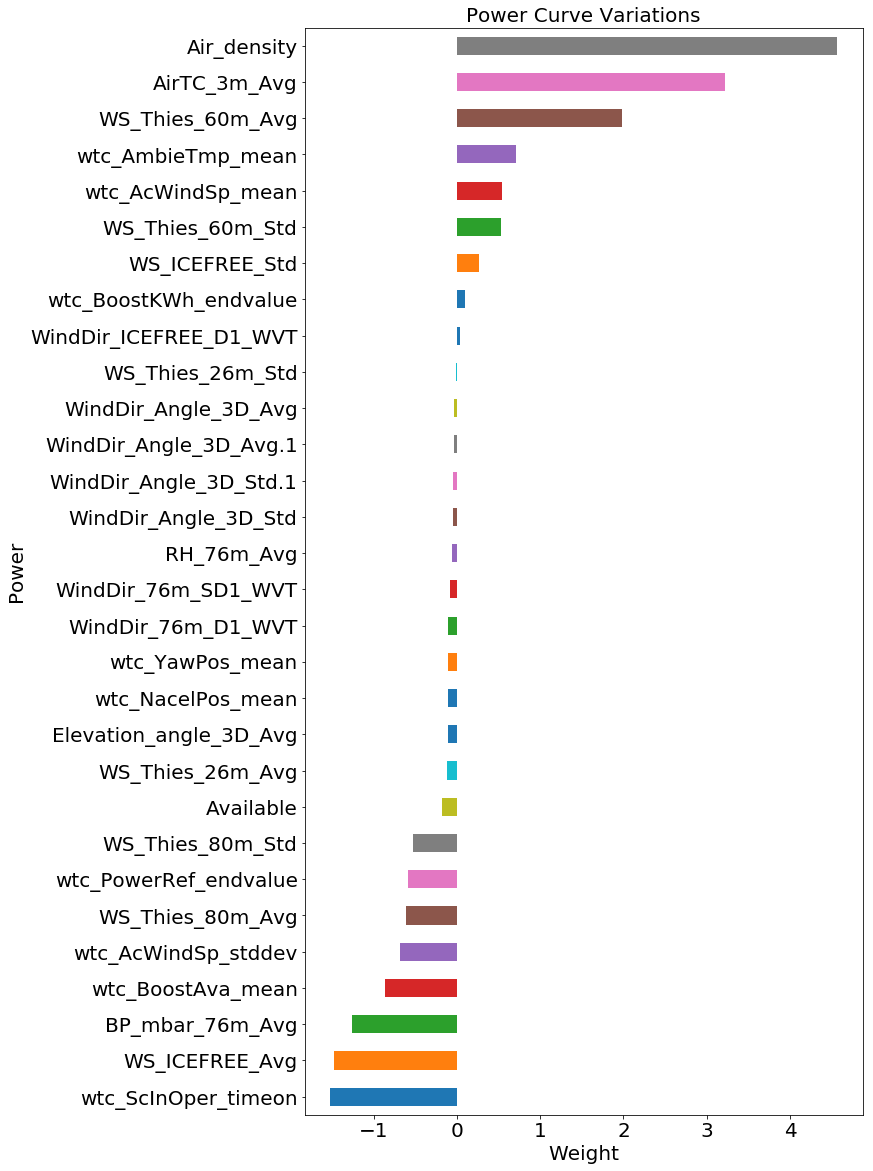

In [109]:
weights = pd.Series(lr_clf.coef_[0],index=df3.columns)
weights.sort_values(inplace=True)

plt.figure(figsize=(10, 20))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

weights.plot(kind='barh')

plt.title("Power Curve Variations")
plt.xlabel('Weight')
plt.ylabel('Power')
#plt.legend()
plt.show()

## Reference Section

[ 7.70514731  0.85471648]


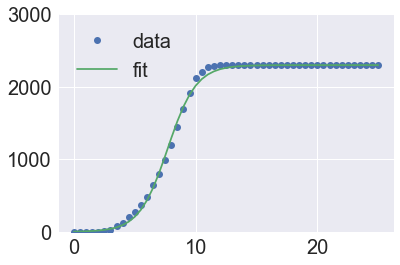

In [22]:
# Reference Curve
import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

#ref = pd.read_csv(path + "LGW_RefPowerCurve.csv")

def sigmoid(x, x0, k):
    cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = ref['WindSpeed'].values
ydata = ref['Power'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

# xdata = df2['wtc_AcWindSp_mean'].values
# ydata = df2['wtc_ActPower_mean'].values

# popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print(popt)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

[ 7.90771506  0.63438992]
Cap= 2423.98275


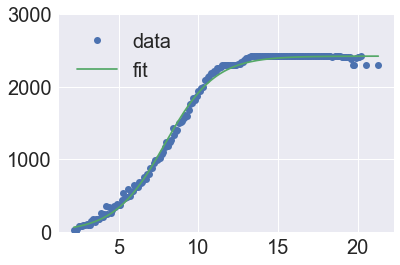

In [19]:
# Historical Maximum

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve95.index.values
ydata = pcurve95['wtc_ActPower_mean'].values
cap = np.max(pcurve95['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

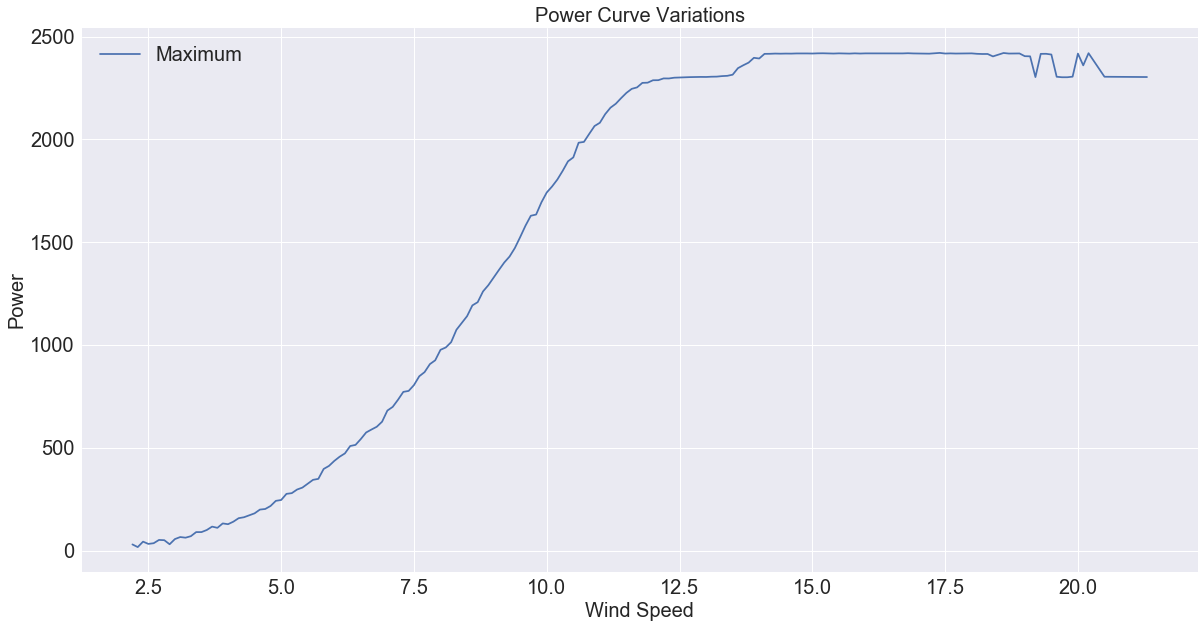

In [31]:
x1 = pcurve50.index.values
y1 = df2['wtc_ActPower_mean'] #pcurve['wtc_ActPower_mean']

x2 = pcurve50.index.values
y2 = pcurve50['wtc_ActPower_mean'] #pcurvemax['wtc_ActPower_mean']

# x3 = pcurve.index.values
# y3 = pcurve['ExpectedEnergy_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

# plt.plot(x1, y1, label='Median')
plt.plot(x2, y2, label='Maximum')
# plt.plot(x3, y3, linestyle = 'dashed', label='Reference')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Variations")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [11]:
df2['Residual_ref'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_ref']
df2['Residual_max'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_max']
df2['Residual_median'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_median']

/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

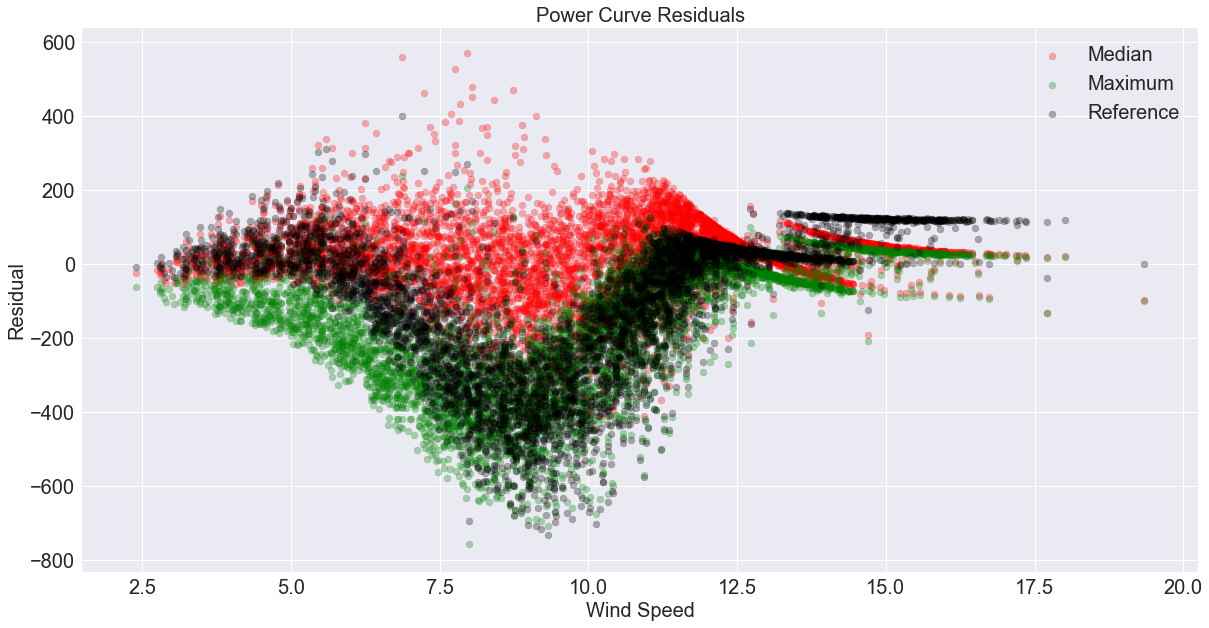

In [102]:
# x1 = df2['wtc_AcWindSp_mean']
# y1 = df2['Residual_median'] 

x2 = df2['wtc_AcWindSp_mean']
y2 = df2['Residual_max'] 

x3 = df2['wtc_AcWindSp_mean']
y3 = df2['Residual_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

# plt.scatter(x1, y1,alpha=0.3, label='Median', c='r')
plt.scatter(x2, y2,alpha=0.3, label='Maximum', c='g')
plt.scatter(x3, y3,alpha=0.3, label='Reference', c='k')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Residuals")
plt.xlabel('Wind Speed')
plt.ylabel('Residual')
plt.legend()
plt.show()

## Visualizations

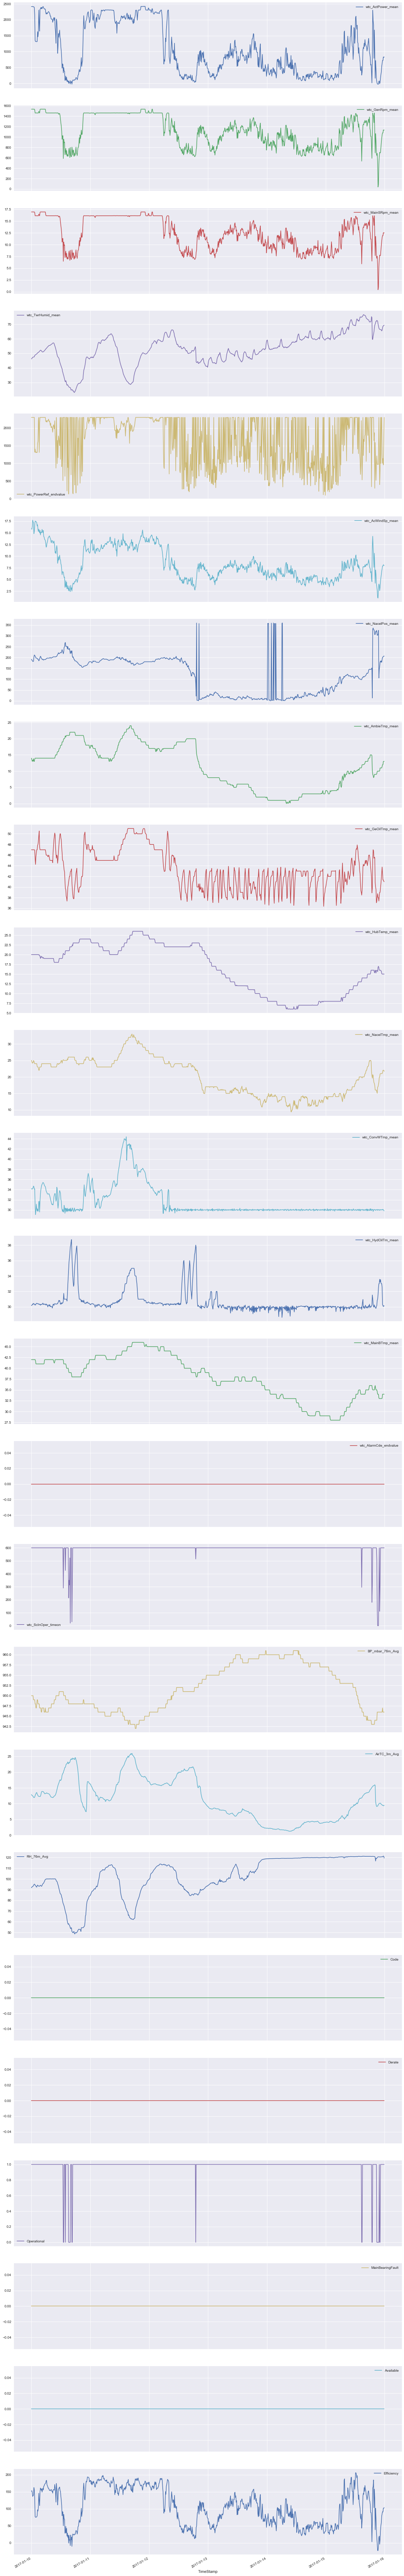

In [17]:
cols = ['wtc_ActPower_mean', 'wtc_GenRpm_mean',
       'wtc_MainSRpm_mean', 'wtc_TwrHumid_mean', 'wtc_PowerRef_endvalue',
       'wtc_AcWindSp_mean', 'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean',
       'wtc_GeOilTmp_mean', 'wtc_HubTemp_mean', 'wtc_NacelTmp_mean',
       'wtc_ConvWTmp_mean', 'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean',
       'wtc_AlarmCde_endvalue', 'wtc_ScInOper_timeon', 'BP_mbar_76m_Avg',
       'AirTC_3m_Avg', 'RH_76m_Avg', 'Code', 'Description', 'Fault Type',
       'Derate', 'Operational', 'MainBearingFault', 'Available', 'Efficiency']
df2[cols].plot(subplots=True, figsize=(20, 150));

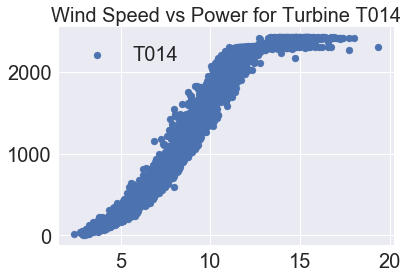

In [240]:
import matplotlib as mpl
# What are the columns
by_turbine = df2.groupby('Name')

x = df2['wtc_AcWindSp_mean']
y = df2['wtc_ActPower_mean']
color = df2['Available']


for name, group in by_turbine:
    plt.scatter(x, 
                y, 
                #c = color,
                label=name)
    plt.title("Wind Speed vs Power for Turbine " + str(name))
    plt.legend()
    plt.show()

# <center> Mini Project 1 - Classification of Wind Turbine Alarms </center>

## <center> MSDS 7331 Data Mining - Section 401 - Mini Project 1 </center> 
### <center> Team:  Sarah Fite, Sheri Loftin, Casey Martinez, Kyle Thomas </center>




<a id="top"></a>
# Table of Contents
* <a href="#Imports and Data">Imports and Data</a>
    - Cleaning the Data
    - Merging the Data
    - Create New Variables
    - Reducing Dataset
* <a href="#Visualizations">Visualizations</a>
     - Plotting Historical Quantiles
     - Sigmoid Curve Fitting
* <a href="#Models">Models</a>
* <a href="#Advantages">Advantages of Each Model</a>
* <a href="#Feature">Feature Importance</a>
* <a href="#Support Vectors">Support Vectors</a>

## Imports and Data

For this project, we continue to examine data provided by Siemens, the wind turbine manufacturer, and Pattern Energy, the owner/operator (Casey Martinez's employer).  For this project we analyze this dataset using both Logistics Regression and Support Vector Machines (SVM).

The background of this data and the business understanding behind it can be found as part of Project 1 at: https://github.com/CaseyRMartinez/DataMiningProject1/blob/master/DataMiningProject1_V5.ipynb

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
#pd.show_versions()

To start, we will first look at the alarm data and one quarter worth of wind farm supervisory control and data acquisition (SCADA) system data.  This SCADA data is specifically used for performance monitoring of large utility-scale wind turbines.

In [2]:
path = '~/Documents/thomaskh522@gmail.com/SMU/DataMining/MiniProject/Data/'
alarms_desc = pd.read_csv(path + "Siemens_Fault_Code_Descriptions.csv")
scada = pd.read_csv(path + "SCADAcombined2017Q1.csv")
print('alarm description shape:',alarms_desc.shape)
print('scada data shape:',scada.shape)

alarm description shape: (2141, 3)
scada data shape: (1111023, 79)


### Cleaning the Data

Next, we dropped missing values from our dataset and removed irrelevant columns.  

In [3]:
# drop columns that were missing values
scada.dropna(thresh=10000,axis=1,inplace=True)

colsdrop = ['StationId', 'CommunicationId', 'NeighbourId',
           'NeighbourIdTwo', 'XPos', 'YPos', 'wtc_ActPower_min',
           'wtc_ActPower_max', 'wtc_ActPower_stddev',
           'wtc_AmpPhR_min', 'wtc_AmpPhR_max', 'wtc_AmpPhR_mean',
           'wtc_AmpPhR_stddev', 'wtc_AmpPhS_min', 'wtc_AmpPhS_max',
           'wtc_AmpPhS_mean', 'wtc_AmpPhS_stddev', 'wtc_AmpPhT_min',
           'wtc_AmpPhT_max', 'wtc_AmpPhT_mean', 'wtc_AmpPhT_stddev',
           'wtc_RawPower_min', 'wtc_RawPower_max', 'wtc_RawPower_mean',
           'wtc_RawPower_stddev', 'wtc_GenRpm_mean',
           'wtc_MainSRpm_mean', 'wtc_PitchRef_BladeA_mean',
           'wtc_PitchRef_BladeB_mean', 'wtc_PitchRef_BladeC_mean','wtc_TwrHumid_mean', 
            'wtc_PitcPosA_mean','wtc_PitcPosB_mean', 'wtc_PitcPosC_mean']

scada.drop(colsdrop,axis=1,inplace=True)

print('scada data shape:',scada.shape)

scada.isnull().sum()

scada data shape: (1111023, 38)


TimeStamp                   0
Name                        0
wtc_ActPower_mean          82
wtc_YawPos_mean            83
wtc_BoostAva_mean         103
wtc_PowerRef_endvalue      81
wtc_AcWindSp_mean          82
wtc_AcWindSp_stddev        82
wtc_NacelPos_mean          83
wtc_AmbieTmp_mean          83
wtc_GeOilTmp_mean          83
wtc_HubTemp_mean           83
wtc_NacelTmp_mean          83
wtc_ConvWTmp_mean          82
wtc_HydOilTm_mean          83
wtc_MainBTmp_mean          83
wtc_AlarmCde_endvalue      83
wtc_ScInOper_timeon        83
wtc_BoostKWh_endvalue     102
WS_Thies_80m_Avg            0
WS_Thies_80m_Std            0
WS_Thies_60m_Avg            0
WS_Thies_60m_Std            0
WS_Thies_26m_Avg            0
WS_Thies_26m_Std            0
WindDir_ICEFREE_D1_WVT      0
WindDir_Angle_3D_Avg        0
WindDir_Angle_3D_Std        0
WindDir_76m_D1_WVT          0
WindDir_76m_SD1_WVT         0
WindDir_Angle_3D_Avg.1      0
WindDir_Angle_3D_Std.1      0
Elevation_angle_3D_Avg      0
WS_ICEFREE

### Merging the Data

After cleaning the data, we merged the alarm data with the SCADA Q1 data in order to conduct logistics regression and SVM prediciton. The following shows the shape of the data after merge.

In [4]:
# merge the alarms with the alarm descriptions

scada.dropna(inplace=True)
scada['wtc_AlarmCde_endvalue'] = scada['wtc_AlarmCde_endvalue'].astype(int)

df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')

# del alarms_desc

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index

df.dropna(inplace=True)

print(df.shape)
df.describe().transpose()

NameError: name 'scada' is not defined

### Create New Variables

We know through independent research and analysis that certain calculated values would strengthen our model, but are not present in our current dataset. Thus, we chose to calculate, create, and add these values to our merged data set.  The variables are:
- WindSpeed_adj - variable created for grouping purposes
- Fault_Type- renamed existing "Fault Type" column to "Fault_Type" and recodes it as integer
- Derated - derating is oeprating a device at less than its optimal capacity in order to prolong its life.  Derating is commonly used on windfarms to prolong the life of a turbine.
- Available- reflects whether or not a turbine is available based faults and if its powered on.
- Air Density- calculates and stores air density calculations

In [3]:
# Create new variables

df['WindSpeed_adj'] = df['wtc_AcWindSp_mean'].round(1) # used for groupby later

# Recode column
df = df.rename(columns={'Fault Type': 'Fault_Type'})
#df['Fault_Type'] = df['Fault_Type'].replace('1', '0')
df['Fault_Type'] = df['Fault_Type'].replace('W','0')
df['Fault_Type'] = df['Fault_Type'].astype(int)

#derate = (df['wtc_ActPower_mean'] == df['wtc_PowerRef_endvalue']) & (df['wtc_PowerRef_endvalue'] < 2300)
derate = (df['wtc_PowerRef_endvalue'] < 2300)

df['Derated'] = [1 if x == True else 0 for x in derate]

available = (df['Fault_Type'] != 1) & (df['wtc_ScInOper_timeon'] == 600)
df['Available'] = [1 if x == True else 0 for x in available]

df['Air_density'] = (df['BP_mbar_76m_Avg']*100)/((df['AirTC_3m_Avg']+273.15)*287.05)

# df['MainBearingFault'] = [1 if x == 64038 else 0 for x in df['Code']]

df.head(100)

NameError: name 'df' is not defined

### Reducing Dataset

The current dataset is 1,048,576 rows of data, thus resulting in very slow processing.  We created a new variable, "turbines," to capture select turbines to process.

In [6]:
# use smaller dataset to test

#turbines = ['T003','T062','T093']
turbines = ['T014']
#turbines = ['T003','T009','T014','T015','T022','T056','T071'] # known main bearing failures

#df2 = df.loc[(df['Name'].isin(turbines)) & (df['Available'] == 1) & (df['Derated'] == 0)]
df2 = df.loc[(df['Name'].isin(turbines))]
             
df2.shape
# df3 = df2['2017-1-10':'2017-1-31']

(12817, 44)

# Visualizations

Following the management of our dataset, we set out to capture various visualizations of our data.

### Plotting Historical Quantiles

In [7]:
pcurve95 = df2.groupby('WindSpeed_adj').quantile(q=0.95)
pcurve75 = df2.groupby('WindSpeed_adj').quantile(q=0.75)
pcurve50 = df2.groupby('WindSpeed_adj').median()
pcurve25 = df2.groupby('WindSpeed_adj').quantile(q=0.25)
pcurve5 = df2.groupby('WindSpeed_adj').quantile(q=0.05)

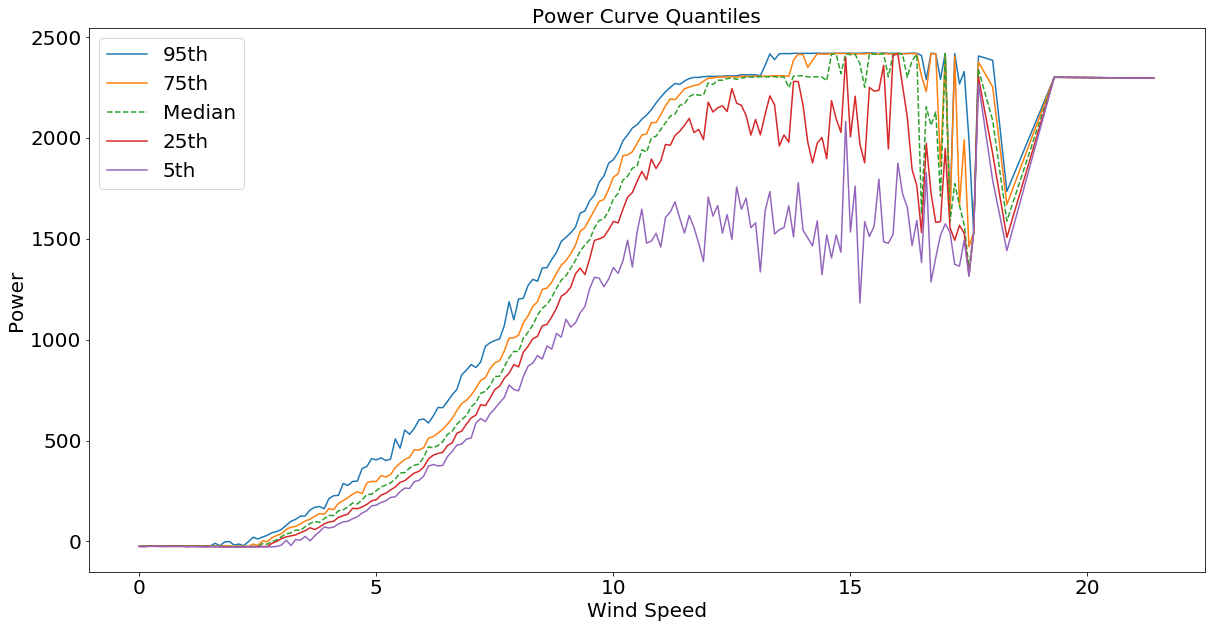

In [8]:
x1 = pcurve95.index.values
y1 = pcurve95['wtc_ActPower_mean'] 

x2 = pcurve75.index.values
y2 = pcurve75['wtc_ActPower_mean'] 

x3 = pcurve50.index.values
y3 = pcurve50['wtc_ActPower_mean'] 

x4 = pcurve25.index.values
y4 = pcurve25['wtc_ActPower_mean'] 

x5 = pcurve5.index.values
y5 = pcurve5['wtc_ActPower_mean'] 

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.plot(x1, y1, label='95th')
plt.plot(x2, y2, label='75th')
plt.plot(x3, y3, linestyle = 'dashed', label='Median')
plt.plot(x4, y4, label='25th')
plt.plot(x5, y5, label='5th')

# plt.axhline(y=2300, color='k')
plt.title("Power Curve Quantiles")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

### Sigmoid Curve Fitting

x0: 8.726235766865742
k: 0.5954186240148661
Cap: 2300.827


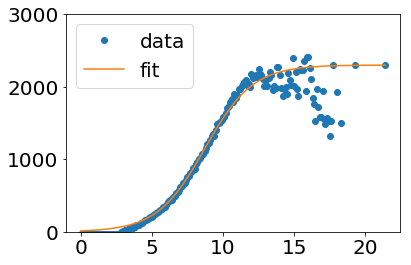

In [17]:
# Historical 25th Percentile

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve25.index.values
ydata = pcurve25['wtc_ActPower_mean'].values
cap = np.max(pcurve5['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)

pcurve25_x0 = popt[0]
pcurve25_k = popt[1]
pcurve25_cap = cap
print('x0:',pcurve25_x0)
print('k:',pcurve25_k)
print('Cap:',pcurve25_cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

[8.59077997 0.63523465]
Cap= 2418.5564999999997


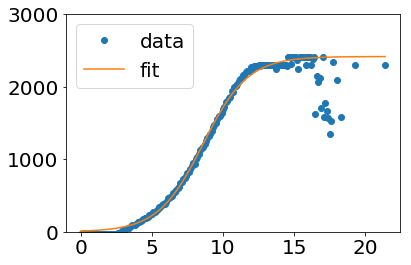

In [18]:
# Historical Median

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve50.index.values
ydata = pcurve50['wtc_ActPower_mean'].values
cap = np.max(pcurve50['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

### Apply Curve Fitting Paramters to DataFrame

In [6]:
def PowerCurve(wind, x0,k,cap):
    y = cap / (1 + np.exp(-k*(wind-x0)))
    return y

df['ExpectedEnergy_ref'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=7.70514731, 
                                                          k=0.85471648, 
                                                          cap=2300), 
                                     axis = 1)
df['ExpectedEnergy_25th'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=pcurve25_x0, 
                                                          k=pcurve25_k,
                                                          cap=pcurve25_cap), 
                                     axis = 1)
df['ExpectedEnergy_median'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'],x0=8.52473917, k=0.66652044, cap=2421.044), axis = 1)

NameError: name 'df2' is not defined

# Classification of Turbine Performance
The goal of this model is to predict if a wind turbine is performing in one of three ways: minimum performance, average (or median performance), or maximum performance.

## Feature Engineering
In order to perform this analysis, class labels will have to be created. This is done by creating a simple function and applying it to the data frame.

In [12]:
# Make labels
# insipred by: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns


def make_class(row):
    if row["wtc_ActPower_mean"] <= row["ExpectedEnergy_25th"]:
        return "1"
    else:
        return "0"

df["Underperformance"] = df.apply(lambda x: make_class(x), axis=1)
df['Underperformance'] = df['Underperformance'].astype(int)

percent = (df['Underperformance'].sum() / len(df))*100
print('Percent of Under Performance Data:',percent,"%")

Percent of Under Performance Data: 48.43841265312385 %


In [13]:
df.columns

Index(['Name', 'wtc_ActPower_mean', 'wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'Code', 'Description', 'Fault_Type', 'WindSpeed_adj', 'Derated',
       'Available', 'Air_density', 'ExpectedEnergy_ref', 'Expect

## Support Vector Machine Preprocessing
According to several references the SVM classifer benefits greatly from scaling of the data. It can speed up the trianing process significantly. SciKitLearn has some built in functions to expidite this processs. First, however, the variables must be encoded from the string class variable into a numeric variable that can be interpreted by SciKitLearn.

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df["Underperformance"].unique()))
df["target"] = le.transform(df["Underperformance"])

#Now the other variables used to train the model need to scaled. First, however, un-need variables need to be dropped.
y = df["target"]



# df3 = df.drop(['wtc_GeOilTmp_mean',
#        'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
#        'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
#        'wtc_ScInOper_timeon', 'WindSpeed_adj','ExpectedEnergy_ref', 'ExpectedEnergy_25th',
#        'ExpectedEnergy_median', 'Underperformance','wtc_ActPower_mean','Fault_Type','Code', 
#         'Description', 'Fault_Type','Name','Derated','target'], axis=1)

keepcols2 = ["Air_density", "wtc_ScInOper_timeon", "AirTC_3m_Avg", "WS_Thies_60m_Avg", "WS_ICEFREE_Avg", "BP_mbar_76m_Avg"]

turbines = ['T014']
data = df.loc[(data['Name'].isin(turbines))]
data = df[keepcols2]


# X = preprocessing.scale(data) 

data.columns

Index(['Air_density', 'wtc_ScInOper_timeon', 'AirTC_3m_Avg',
       'WS_Thies_60m_Avg', 'WS_ICEFREE_Avg', 'BP_mbar_76m_Avg'],
      dtype='object')

## Create Training and Test Data (80/20 Split)

In [23]:
#  Make test and training data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train

array([[ 0.22961316, -0.21613883, -0.26277971, ...,  0.78579241,
         0.30854491, -0.00581555],
       [-0.20531963, -0.21613883, -0.82876568, ..., -0.91307239,
         0.30854491, -1.55763762],
       [ 0.10267277, -0.21613883, -1.14763101, ..., -0.37262076,
         0.30854491, -1.51790481],
       ...,
       [ 0.09187985, -0.21613883,  0.77672128, ...,  0.77732138,
         0.30854491,  0.05510288],
       [ 0.85240905, -0.21613883,  0.77672128, ...,  0.67990455,
         0.30854491, -0.0221895 ],
       [-1.39728904, -0.21613883, -1.64665526, ...,  0.78155689,
         0.30854491,  1.6301979 ]])

## Create a model and optimize parameters with Grid Search
Since there are many possible parameters that can be put into the classifer, I ran through various kernels and penalty terms to find the strongest possible model based on the input parameters.

SciKitLearn Provides an excellent example on using grid search to find optimal parameters using cross validation.

http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

## Results
The best SVM was a linear kernel with a value of C set to 0.1. It results in perfect prediction of the variables. Very high, and potentially suspect results. However, wind turbines are mechanical systems that are driven purley by physics. Thus, it makes sense that given enough data that perfect (or near perfect) predicitons could be made. It should be noted however, that other kernels and values for C resutled in far less accurate predictions (down to 84% percision).

In [ ]:
# Thanks to sklearn for a great example: 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
clist = [0.1, 1, 10, 100]
tuned_parameters = [{'kernel': ['rbf'], 'C': clist},
                    {'kernel': ['linear'], 'C': clist},
                    {'kernel': ['poly'], 'C': clist},
                    {'kernel': ['sigmoid'], 'C': clist}
                   ]
                    
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(classification_report(y_true, y_pred))
print()
print("Accuracy:", acc)

## Investigation of chosen support vectors

Investigation of the support vectors can tell us about the hyperplane used to seperate the data. Specifically, it shows us which vectors define placement of classes. This knowledge can be especially useful when classifying edge cases (where outlier data may be present) in which items could be misclassified. However, the training data is very high dimensional, as a result, looking at the actual support vectors is not immediately helpful.

In [68]:
#First I want to create a new model object based on the results of the Grid Search
svm_class = svm.SVC(C=0.1, kernel='linear', gamma='auto')
svm_class.fit(X_train,y_train)

#borrowed from Machine Learning notebook 4
y_hat = svm_class.predict(X_test)
acc = accuracy_score(y_test,y_hat)
conf = confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)



accuracy: 1.0
[[3198    0]
 [   0  191]]


In [69]:
#Results are the same as the grid search (logic check)

#Now I want to investigate the chosen support vectors
sv = svm_class.support_vectors_
sv

array([[-0.05806607,  3.00563056,  0.        , ...,  0.        ,
         0.1260647 , -0.25322141],
       [-1.03283891, -0.36219805,  0.        , ...,  0.        ,
         1.88615874, -0.25322141],
       [ 1.42838963,  1.9337333 ,  0.        , ...,  0.        ,
        -0.31635555, -0.25322141],
       ..., 
       [-2.11723875, -0.36219805,  0.        , ...,  0.        ,
        -1.03530627,  3.94911314],
       [ 1.66557828, -0.36219805,  0.        , ...,  0.        ,
         0.23542382,  3.94911314],
       [ 0.64454473, -0.36219805,  0.        , ...,  0.        ,
         1.9311678 ,  3.94911314]])

## SVM To Do:
1. Investigate chosen support vectors (need to discuss with team)
2. Make sure I do not have any variables that are leaking information to the model.
3. Compare to logistic regression classification model
4. Conduct write up

## Logistic Regression

In [84]:
df.columns

Index(['Name', 'wtc_ActPower_mean', 'wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'WindSpeed_adj', 'Code', 'Description', 'Fault_Type', 'Derated',
       'Available', 'Air_density', 'ExpectedEnergy_ref', 'Expect

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df["Underperformance"].unique()))
df["target"] = le.transform(df["Underperformance"])

#Now the other variables used to train the model need to scaled. First, however, un-need variables need to be dropped.
y = df["target"]

keepcols = ['wtc_YawPos_mean', 'wtc_BoostAva_mean',
       'wtc_PowerRef_endvalue', 'wtc_AcWindSp_mean', 'wtc_AcWindSp_stddev',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean','wtc_ScInOper_timeon', 'wtc_BoostKWh_endvalue', 'WS_Thies_80m_Avg',
       'WS_Thies_80m_Std', 'WS_Thies_60m_Avg', 'WS_Thies_60m_Std',
       'WS_Thies_26m_Avg', 'WS_Thies_26m_Std', 'WindDir_ICEFREE_D1_WVT',
       'WindDir_Angle_3D_Avg', 'WindDir_Angle_3D_Std', 'WindDir_76m_D1_WVT',
       'WindDir_76m_SD1_WVT', 'WindDir_Angle_3D_Avg.1',
       'WindDir_Angle_3D_Std.1', 'Elevation_angle_3D_Avg', 'WS_ICEFREE_Avg',
       'WS_ICEFREE_Std', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'RH_76m_Avg',
       'Available', 'Air_density']


df3 = df[keepcols]
X = preprocessing.scale(df3) 

In [18]:
#  Make test and training data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
lr_clf = LogisticRegression(C=1.0, class_weight=None)

In [105]:
from sklearn.model_selection import ShuffleSplit
    
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)                       

In [106]:
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
   
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    

====Iteration 0  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 1  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 2  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 3  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 4  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 5  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 6  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 7  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 8  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]
====Iteration 9  ====
accuracy 0.7714508580343213
confusion matrix
 [[1662  120]
 [ 466  316]]


In [107]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.77223089 0.77730109 0.7726209  0.77106084 0.79407176 0.77223089
 0.76794072 0.78549142 0.76287051 0.77574103]


In [108]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df3.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

wtc_YawPos_mean has weight of -0.10955266437940264
wtc_BoostAva_mean has weight of -0.8588356598635162
wtc_PowerRef_endvalue has weight of -0.5910979025592302
wtc_AcWindSp_mean has weight of 0.5422287518617013
wtc_AcWindSp_stddev has weight of -0.6812048722234993
wtc_NacelPos_mean has weight of -0.10979850887886626
wtc_AmbieTmp_mean has weight of 0.7070814472529159
wtc_ScInOper_timeon has weight of -1.5221048685050347
wtc_BoostKWh_endvalue has weight of 0.09801490633793304
WS_Thies_80m_Avg has weight of -0.608578910371097
WS_Thies_80m_Std has weight of -0.5267309954134965
WS_Thies_60m_Avg has weight of 1.987867741594906
WS_Thies_60m_Std has weight of 0.5355856575655676
WS_Thies_26m_Avg has weight of -0.11765103538059787
WS_Thies_26m_Std has weight of -0.011908844035619127
WindDir_ICEFREE_D1_WVT has weight of 0.03296334103326118
WindDir_Angle_3D_Avg has weight of -0.03552161352262388
WindDir_Angle_3D_Std has weight of -0.0459422310585326
WindDir_76m_D1_WVT has weight of -0.1029949295929

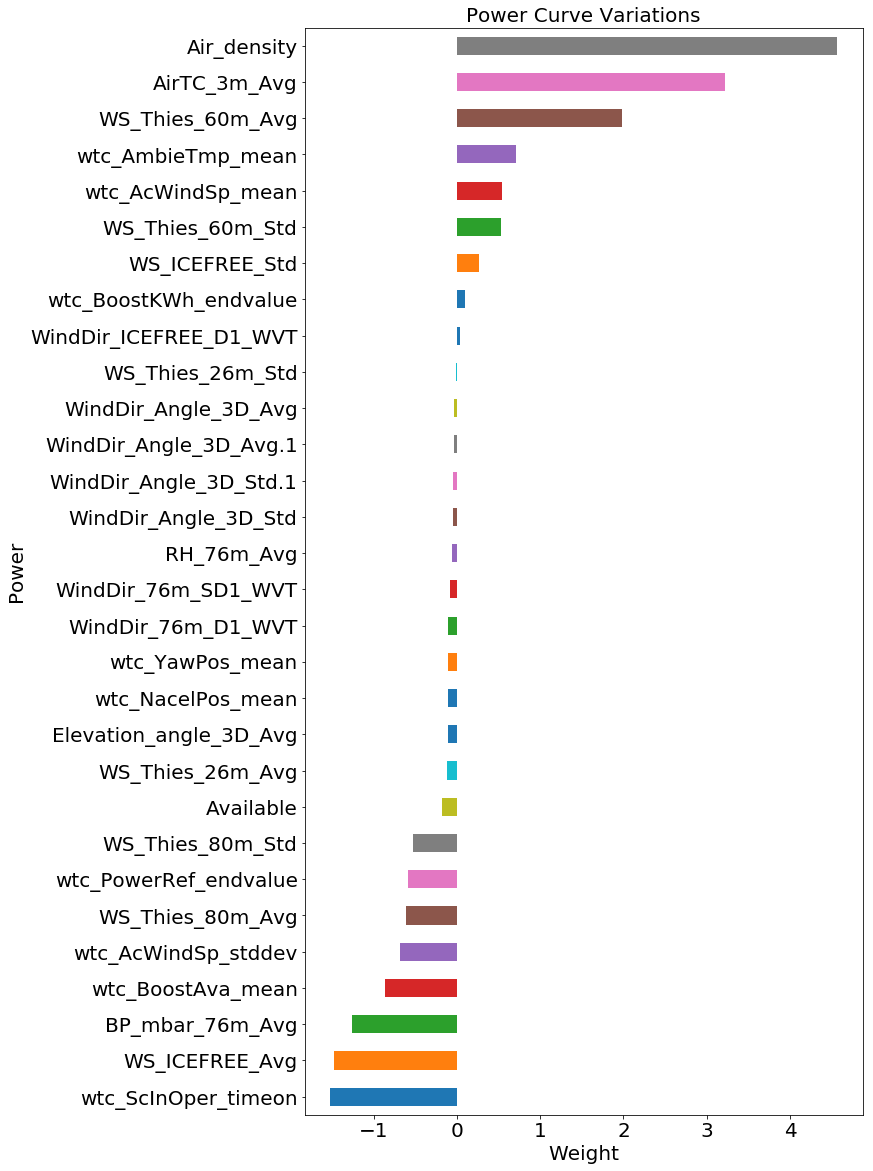

In [109]:
weights = pd.Series(lr_clf.coef_[0],index=df3.columns)
weights.sort_values(inplace=True)

plt.figure(figsize=(10, 20))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

weights.plot(kind='barh')

plt.title("Power Curve Variations")
plt.xlabel('Weight')
plt.ylabel('Power')
#plt.legend()
plt.show()

## Reference Section

[ 7.70514731  0.85471648]


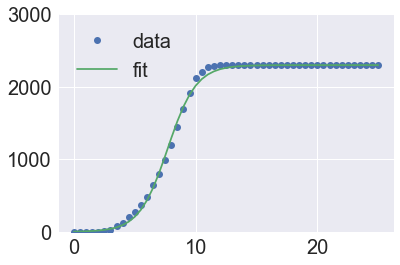

In [22]:
# Reference Curve
import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

#ref = pd.read_csv(path + "LGW_RefPowerCurve.csv")

def sigmoid(x, x0, k):
    cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = ref['WindSpeed'].values
ydata = ref['Power'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

# xdata = df2['wtc_AcWindSp_mean'].values
# ydata = df2['wtc_ActPower_mean'].values

# popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print(popt)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

[ 7.90771506  0.63438992]
Cap= 2423.98275


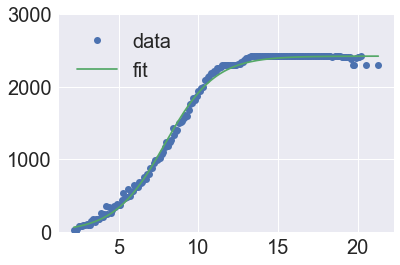

In [19]:
# Historical Maximum

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve95.index.values
ydata = pcurve95['wtc_ActPower_mean'].values
cap = np.max(pcurve95['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

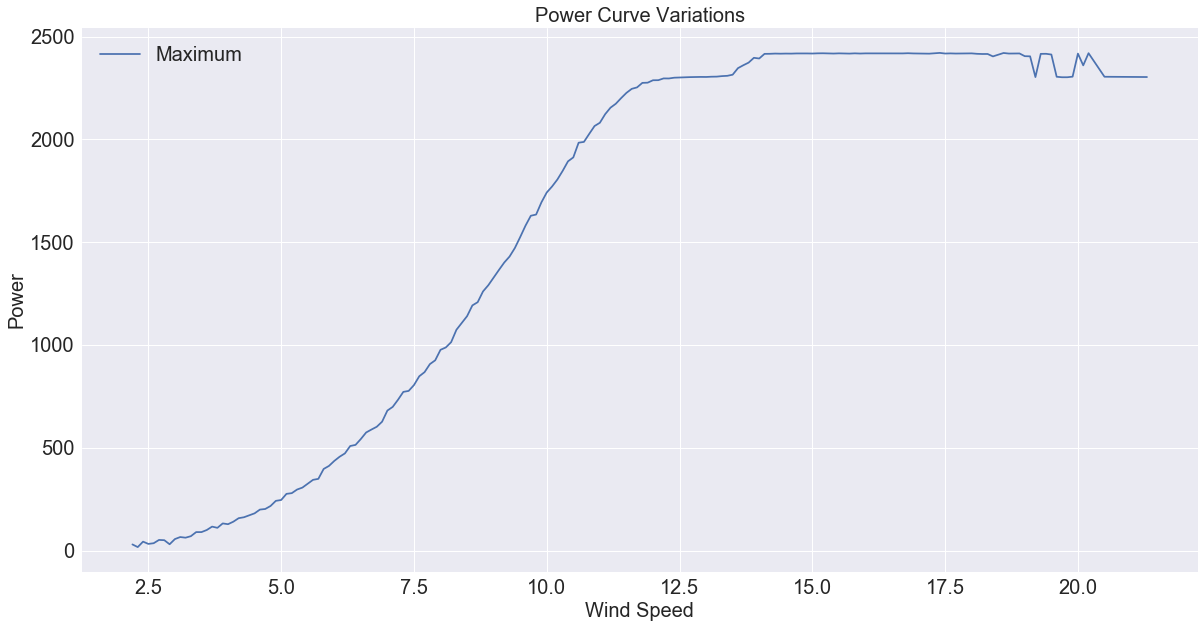

In [31]:
x1 = pcurve50.index.values
y1 = df2['wtc_ActPower_mean'] #pcurve['wtc_ActPower_mean']

x2 = pcurve50.index.values
y2 = pcurve50['wtc_ActPower_mean'] #pcurvemax['wtc_ActPower_mean']

# x3 = pcurve.index.values
# y3 = pcurve['ExpectedEnergy_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

# plt.plot(x1, y1, label='Median')
plt.plot(x2, y2, label='Maximum')
# plt.plot(x3, y3, linestyle = 'dashed', label='Reference')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Variations")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [11]:
df2['Residual_ref'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_ref']
df2['Residual_max'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_max']
df2['Residual_median'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_median']

/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

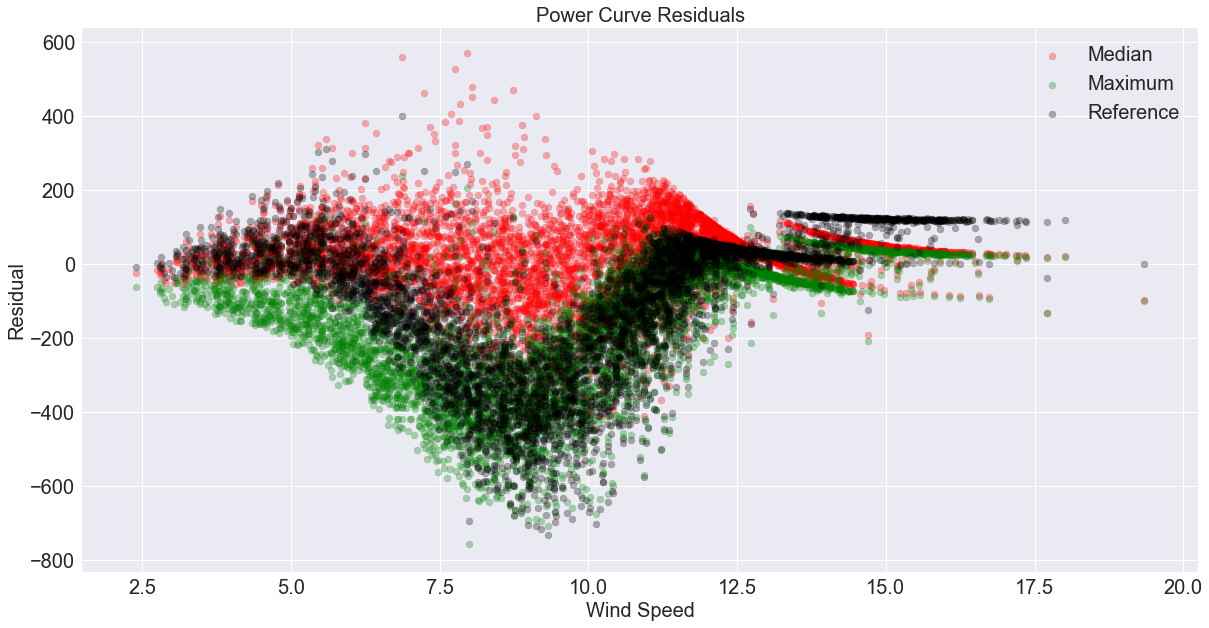

In [102]:
# x1 = df2['wtc_AcWindSp_mean']
# y1 = df2['Residual_median'] 

x2 = df2['wtc_AcWindSp_mean']
y2 = df2['Residual_max'] 

x3 = df2['wtc_AcWindSp_mean']
y3 = df2['Residual_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

# plt.scatter(x1, y1,alpha=0.3, label='Median', c='r')
plt.scatter(x2, y2,alpha=0.3, label='Maximum', c='g')
plt.scatter(x3, y3,alpha=0.3, label='Reference', c='k')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Residuals")
plt.xlabel('Wind Speed')
plt.ylabel('Residual')
plt.legend()
plt.show()

## Visualizations

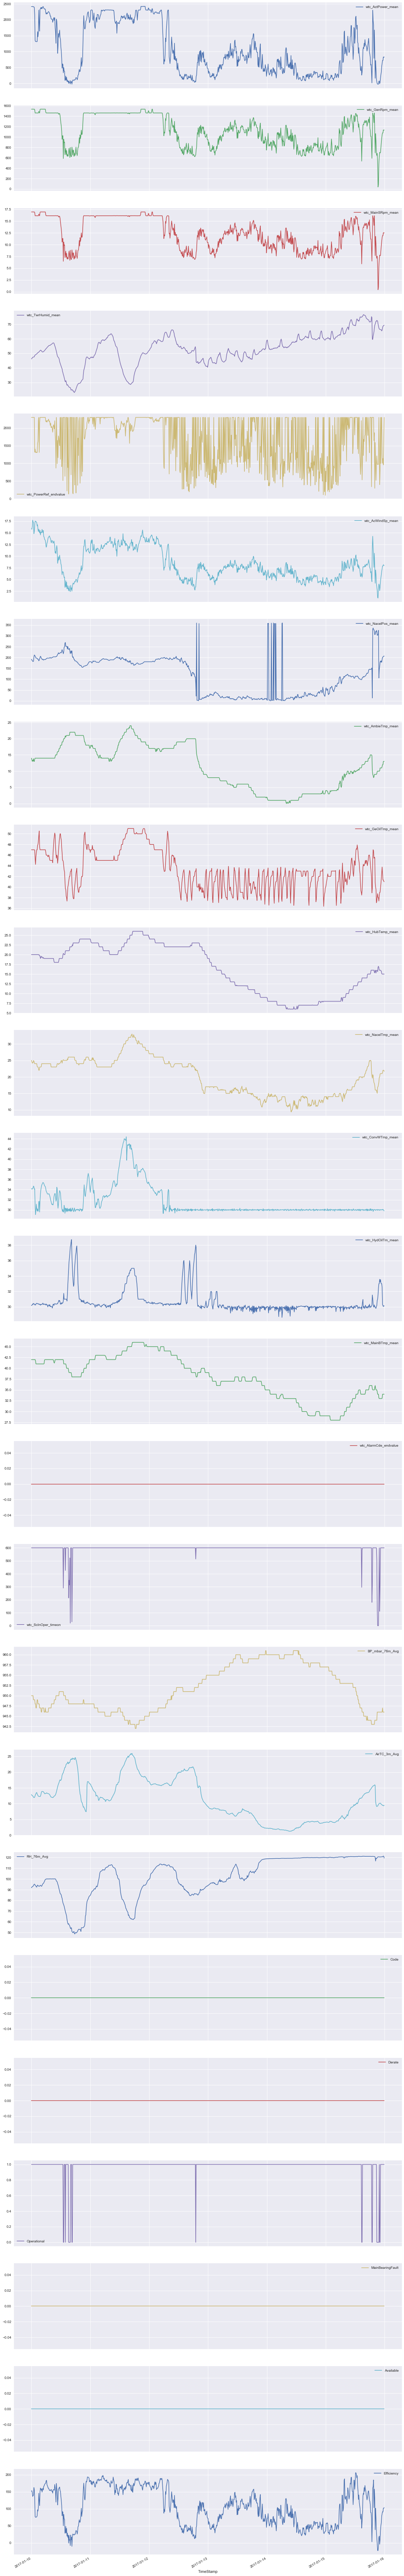

In [17]:
cols = ['wtc_ActPower_mean', 'wtc_GenRpm_mean',
       'wtc_MainSRpm_mean', 'wtc_TwrHumid_mean', 'wtc_PowerRef_endvalue',
       'wtc_AcWindSp_mean', 'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean',
       'wtc_GeOilTmp_mean', 'wtc_HubTemp_mean', 'wtc_NacelTmp_mean',
       'wtc_ConvWTmp_mean', 'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean',
       'wtc_AlarmCde_endvalue', 'wtc_ScInOper_timeon', 'BP_mbar_76m_Avg',
       'AirTC_3m_Avg', 'RH_76m_Avg', 'Code', 'Description', 'Fault Type',
       'Derate', 'Operational', 'MainBearingFault', 'Available', 'Efficiency']
df2[cols].plot(subplots=True, figsize=(20, 150));

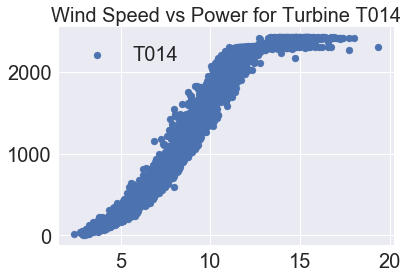

In [240]:
import matplotlib as mpl
# What are the columns
by_turbine = df2.groupby('Name')

x = df2['wtc_AcWindSp_mean']
y = df2['wtc_ActPower_mean']
color = df2['Available']


for name, group in by_turbine:
    plt.scatter(x, 
                y, 
                #c = color,
                label=name)
    plt.title("Wind Speed vs Power for Turbine " + str(name))
    plt.legend()
    plt.show()